In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from tabular_policy_maze.maze_env import MazeEnv, plot_maze

---
## Simple 4x4:

<Axes: >

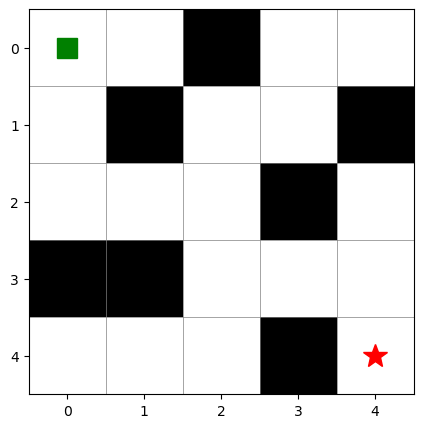

In [62]:
maze = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
])

env = MazeEnv(maze, start=(0, 0), goal=(4, 4), goal_reward=0)
plot_maze(env)

---
## Tabular REINFORCE: (no neural net)

In [ ]:
from tabular_policy_maze.reinforce import (
                train_reinforce,
                train_reinforce_with_baseline,
                plot_maze_with_trajectory,
                plot_steps_distribution,
            )

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Mean return')

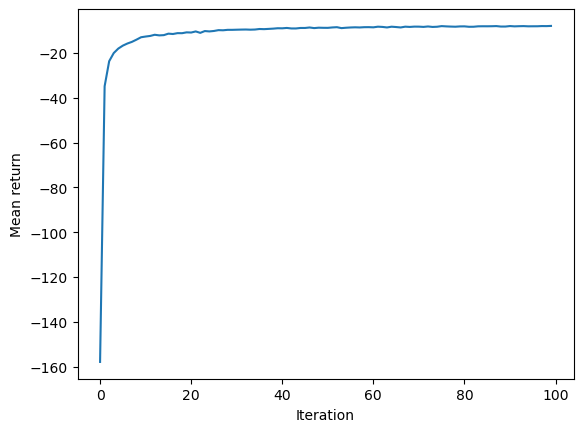

In [77]:
theta, mean_returns = train_reinforce(env, n_iter=100, n_episodes=512, alpha=0.05, gamma=1.0)

plt.plot(mean_returns)
plt.xlabel("Iteration")
plt.ylabel("Mean return")

<Axes: title={'center': 'Policy rollout  (steps: 8, reached goal)'}>

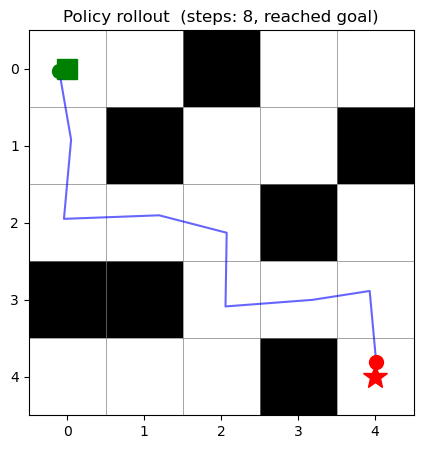

In [46]:
plot_maze_with_trajectory(env, theta, title="Policy rollout")

Sampling trajectories:   0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: title={'center': 'Steps distribution — success rate: 100.0%'}, xlabel='Steps', ylabel='Count'>

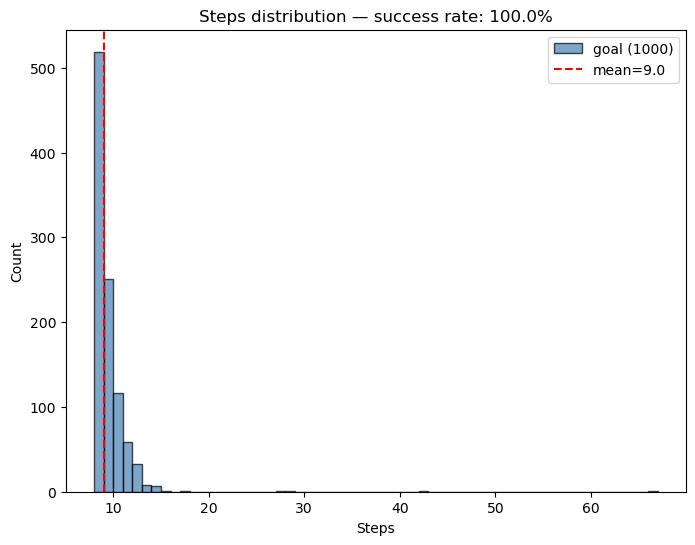

In [ ]:
plot_steps_distribution(env, theta, n_trajectories=1000, figsize=(8, 6))

## With baseline

In [ ]:
theta_baseline, mean_returns_baseline = train_reinforce_with_baseline(env, n_iter=100, n_episodes=512, alpha=0.05, gamma=1, alpha_v=0.01)

Text(0, 0.5, 'Mean return')

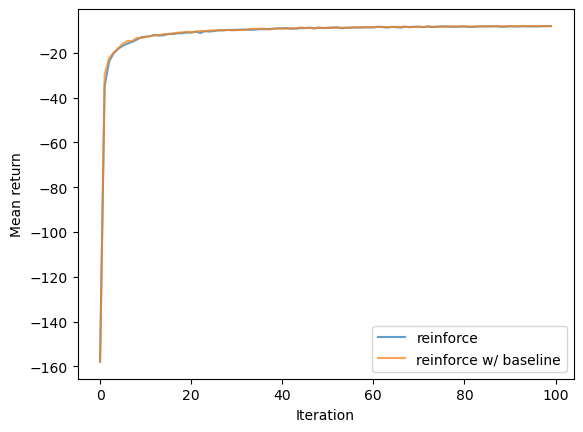

In [79]:
plt.plot(mean_returns, label='reinforce', alpha=0.7)
plt.plot(mean_returns_baseline, label='reinforce w/ baseline', alpha=0.7)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Mean return")

Sampling trajectories:   0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: title={'center': 'Steps distribution — success rate: 100.0%'}, xlabel='Steps', ylabel='Count'>

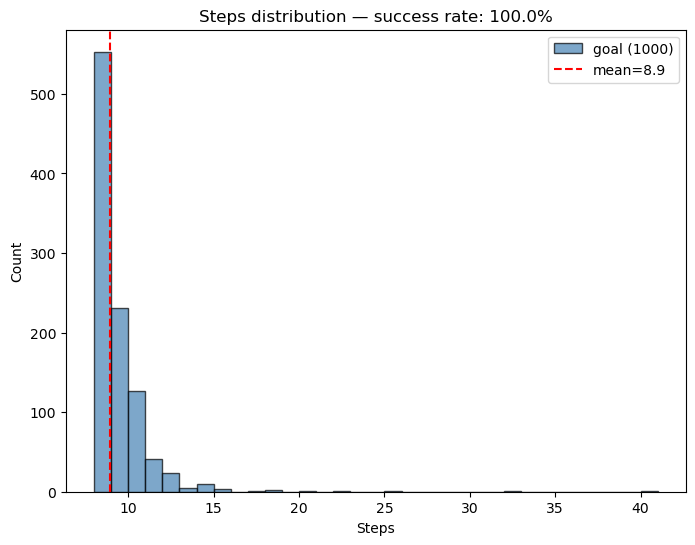

In [ ]:
plot_steps_distribution(env, theta_baseline, n_trajectories=1000, figsize=(8, 6))

---
## Exploring Tabular Policy for bigger Mazes:

- Let's create function to create maze of given size with given % of obstacles:

In [85]:
from tabular_policy_maze.util import generate_maze_env, build_maze_env
from tabular_policy_maze.maze_env import MazeEnv, MazeEnvWithDistanceReward

States: 113, Actions: 4


<Axes: >

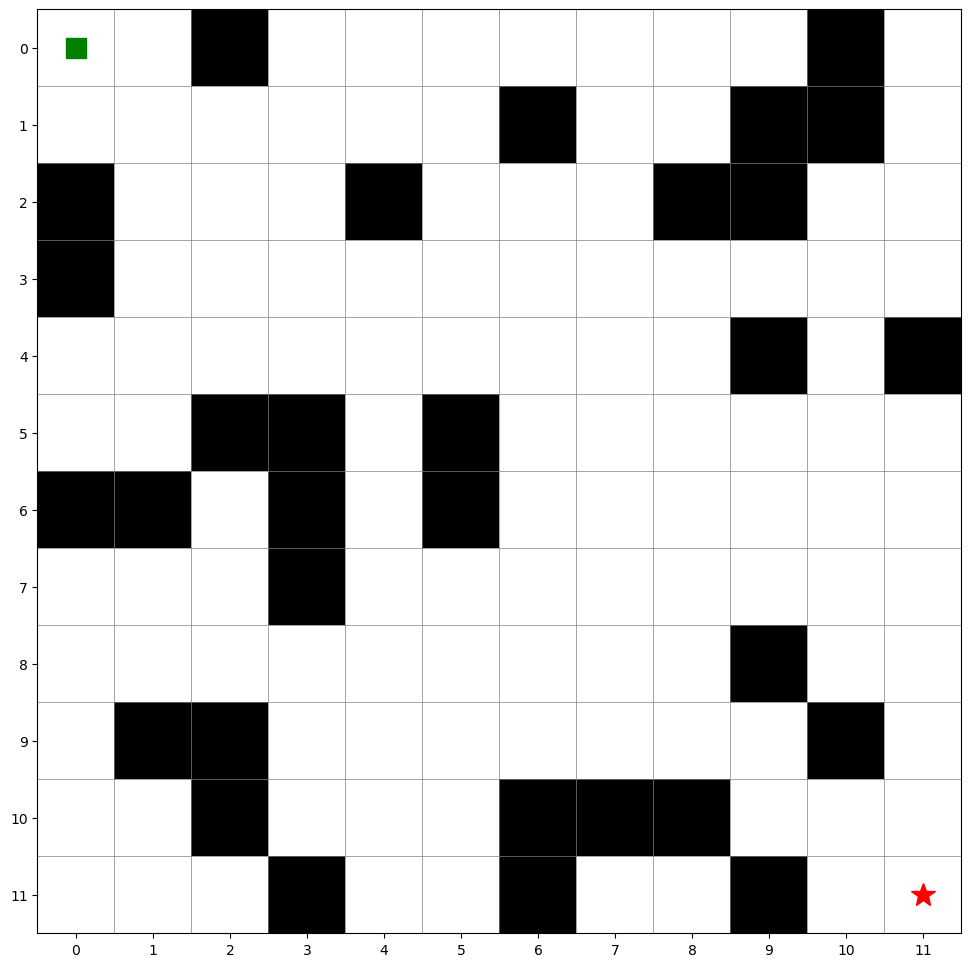

In [82]:
env = generate_maze_env(12, obstacle_pct=0.25, seed=50, max_steps=500)
print(f"States: {env.n_states}, Actions: {env.n_actions}")
plot_maze(env)

In [83]:
theta, mean_returns = train_reinforce(env, n_iter=100, n_episodes=512, alpha=0.05, gamma=1.0)

theta_baseline, mean_returns_baseline = train_reinforce_with_baseline(env, n_iter=100, n_episodes=512, alpha=0.05, gamma=1, alpha_v=0.01)

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Mean return')

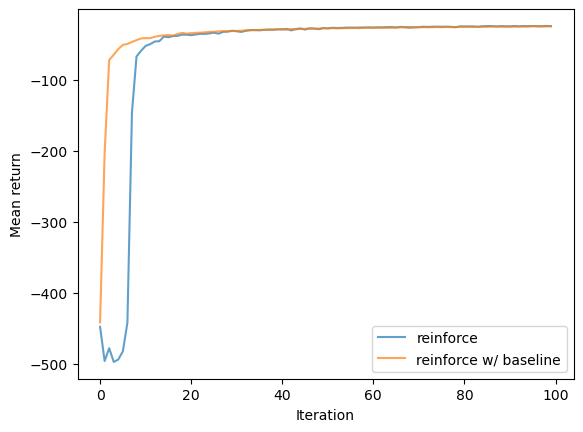

In [84]:
plt.plot(mean_returns, label='reinforce', alpha=0.7)
plt.plot(mean_returns_baseline, label='reinforce w/ baseline', alpha=0.7)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Mean return")

<Axes: title={'center': 'Policy rollout  (steps: 500, TRUNCATED)'}>

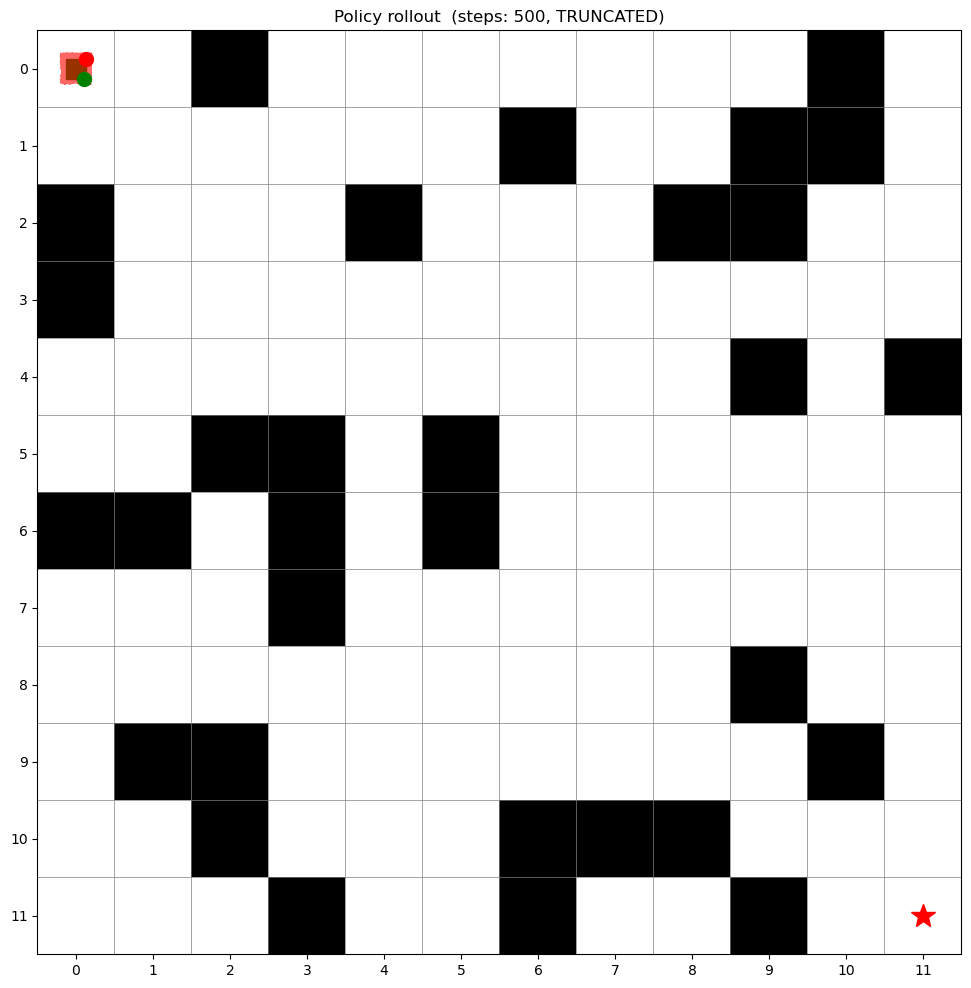

In [ ]:
plot_maze_with_trajectory(env, theta, title="Policy rollout")

Sampling trajectories:   0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: title={'center': 'Steps distribution — success rate: 100.0%'}, xlabel='Steps', ylabel='Count'>

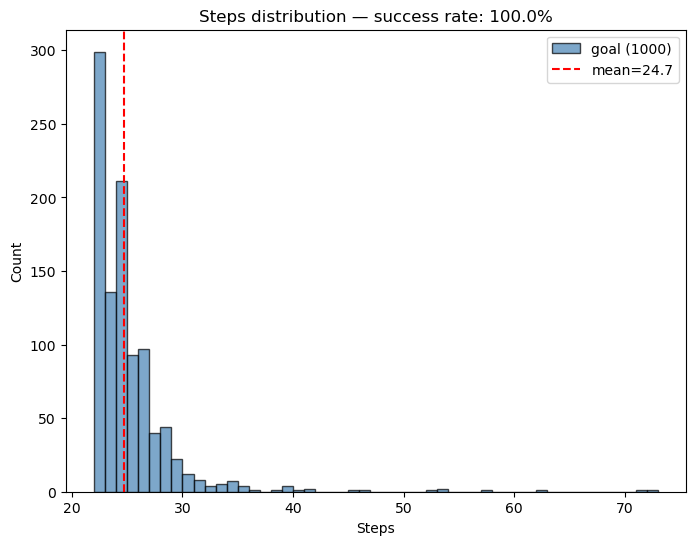

In [56]:
plot_steps_distribution(env, theta, n_trajectories=1000, figsize=(8, 6))

In [88]:
env = build_maze_env(MazeEnvWithDistanceReward, 12, obstacle_pct=0.25, seed=50, max_steps=500)
print(f"States: {env.n_states}, Actions: {env.n_actions}")

States: 113, Actions: 4


In [89]:
theta, mean_returns = train_reinforce(env, n_iter=100, n_episodes=512, alpha=0.05, gamma=1.0)

theta_baseline, mean_returns_baseline = train_reinforce_with_baseline(env, n_iter=100, n_episodes=512, alpha=0.05, gamma=1, alpha_v=0.01)

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'Mean return')

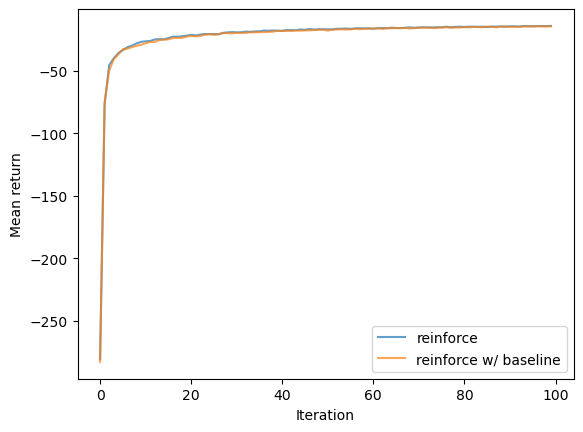

In [90]:
plt.plot(mean_returns, label='reinforce', alpha=0.7)
plt.plot(mean_returns_baseline, label='reinforce w/ baseline', alpha=0.7)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Mean return")

---
## Doing evaluation across multiple seeds for given Maze parameters:

In [91]:
from tabular_policy_maze.util import benchmark

In [ ]:
reinforce_args = {
    'n_iter': 100,
    'n_episodes': 256,
    'alpha': 0.05,
    'gamma': 0.999,
}

maze_args = {
    'size': 12,
    'obstacle_pct': 0.25,
    'max_steps': 500,
    'step_reward': -1.0,
    'goal_reward': 0.0, 
}

benchmark(
    train_method=train_reinforce,
    train_arguments=reinforce_args,
    maze_class=MazeEnv,
    maze_arguments=maze_args,
    n_seeds=16,
    n_eval=256
)

Seeds:   0%|          | 0/16 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [93]:
reinforce_with_baseline_args = {
    'n_iter': 100,
    'n_episodes': 256,
    'alpha': 0.05,
    'gamma': 0.999,
    'alpha_v': 0.05,
}

maze_args = {
    'size': 12,
    'obstacle_pct': 0.25,
    'max_steps': 500,
    'step_reward': -1.0,
    'goal_reward': 0.0,
}

benchmark(
    train_method=train_reinforce_with_baseline,
    train_arguments=reinforce_args,
    maze_class=MazeEnv,
    maze_arguments=maze_args,
    n_seeds=16,
    n_eval=256
)

Seeds:   0%|          | 0/16 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]

REINFORCE Iteration:   0%|          | 0/100 [00:00<?, ?it/s]


Maze 12x12, obstacles=25%, seeds=16
Success rate: 75.0% ± 43.3%
Mean steps (goal only): 26.2 ± 1.8


{'n_seeds': 16,
 'avg_success_rate': 0.75,
 'std_success_rate': 0.4330127018922193,
 'avg_steps': 26.162109375,
 'std_steps': 1.8171226045977125,
 'per_seed': [{'seed': 0,
   'n_states': 112,
   'success_rate': 1.0,
   'mean_steps': 24.5625,
   'final_return': -23.68668340483405},
  {'seed': 1,
   'n_states': 106,
   'success_rate': 1.0,
   'mean_steps': 25.48828125,
   'final_return': -23.950094598740364},
  {'seed': 2,
   'n_states': 107,
   'success_rate': 1.0,
   'mean_steps': 29.31640625,
   'final_return': -27.992198403938946},
  {'seed': 3,
   'n_states': 107,
   'success_rate': 1.0,
   'mean_steps': 25.171875,
   'final_return': -23.81580642790597},
  {'seed': 4,
   'n_states': 119,
   'success_rate': 1.0,
   'mean_steps': 29.01953125,
   'final_return': -27.663372537576585},
  {'seed': 5,
   'n_states': 111,
   'success_rate': 0.0,
   'mean_steps': inf,
   'final_return': -393.6210551388146},
  {'seed': 6,
   'n_states': 112,
   'success_rate': 1.0,
   'mean_steps': 24.734375,

In [ ]:
reinforce_with_baseline_args = {
    'n_iter': 100,
    'n_episodes': 256,
    'alpha': 0.05,
    'gamma': 0.999,
    'alpha_v': 0.05,
}

maze_args = {
    'size': 12,
    'obstacle_pct': 0.25,
    'max_steps': 500,
    'step_reward': -1.0,
    'goal_reward': 0.0,
}

benchmark(
    train_method=train_reinforce_with_baseline,
    train_arguments=reinforce_args,
    maze_class=MazeEnvWithDistanceReward,
    maze_arguments=maze_args,
    n_seeds=16,
    n_eval=256
)